## Download libraries and access the dataset file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sweetviz

In [3]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree

# Statistic visualization
import sweetviz as sv

#Tree Visualization
import graphviz

In [4]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA/titanic.zip')

## First Step
- Create variables for the 'train', 'test' and 'gender' data
- Check the composition of each table
- Switch string values to integer or float values
- Use Sweetviz to identify columns with low correlation with the target variable ('Survived')
- Remove some columns.

### Creating variables and check the composition of each table

In [5]:
data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [6]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
alldata = [data_train, data_test]

### Gathering informations about the tables

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Searching for null values, replacing them with the most common value in the column, and converting strings to integers

In [13]:
print(data_train['Embarked'].describe(),'\n')
print('Null Values =', data_train['Embarked'].isna().sum())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object 

Null Values = 2


In [14]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [15]:
print('Data_train:\n',data_train['Fare'].describe(),'\n')
print('Null Values =', data_train['Fare'].isna().sum(),'\n\n')

print('Data_test:\n',data_test['Fare'].describe(),'\n')
print('Null Values =', data_test['Fare'].isna().sum())

Data_train:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 

Null Values = 0 


Data_test:
 count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64 

Null Values = 1


In [16]:
data_test['Fare'] = data_test['Fare'].fillna(0)

for dataset in alldata:
  dataset['Fare'] = dataset['Fare'].astype(int)

In [17]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Sweetviz

In [18]:
my_report_train = sv.analyze(data_train)
my_report_train.show_html("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Removing columns

In [19]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Age'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Age'], axis=1)

In [20]:
data_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7,0
1,1,1,1,1,0,71,1
2,1,3,1,0,0,7,0
3,1,1,1,1,0,53,0
4,0,3,0,0,0,8,0


In [21]:
data_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,7,2
1,3,1,1,0,7,0
2,2,0,0,0,9,2
3,3,0,0,0,8,0
4,3,1,1,1,12,0


## Second Step
- Supervised Learning
- Final Decision on Results
- Decision Tree Visualization
- Graphs to Illustrate Decision Making with Different Parameters

### Supervised Learning and Final Decision

In this stage, I chose to use a max_depth of 1 because the decision in the Decision Tree tends to have higher accuracy in the level 1 of the tree.

In [29]:
X_train = data_train.drop(['Survived'], axis = 1).values
y_train = data_train['Survived'].values

X_test = data_test.values
y_test = data_gender['Survived'].values

clf = DecisionTreeClassifier(min_samples_split = 10, max_depth = 1, random_state = 0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = balanced_accuracy_score(y_test, y_pred)

print(f'Accurancy rate = {round(score*100,2)} %')


Accurancy rate = 100.0 %


### Decision Tree Classifier and Graphs

#### Decision Tree Classifier

In the image, you'll notice that the tree makes decisions primarily based on its right side. With this information, another approach to achieving 100% accuracy without overfitting is to set min_samples_split to 315.

In [23]:
attributes = data_train.columns.values.tolist()
if attributes[0] == 'Survived':
  del attributes[0]

decisoes = np.unique(data_train['Survived'].values).tolist()

j = 0
for i in decisoes:
  decisoes[j] = str(i)
  j += 1

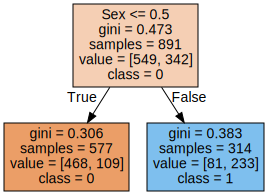

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=decisoes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

#### Graphs Showing the difference of choosing different parameters on classifier function.

- Changing the min_samples_split

Accurancy rate = 85.06 %
Accurancy rate = 86.56 %
Accurancy rate = 85.76 %
Accurancy rate = 90.27 %
Accurancy rate = 88.02 %
Accurancy rate = 92.06 %


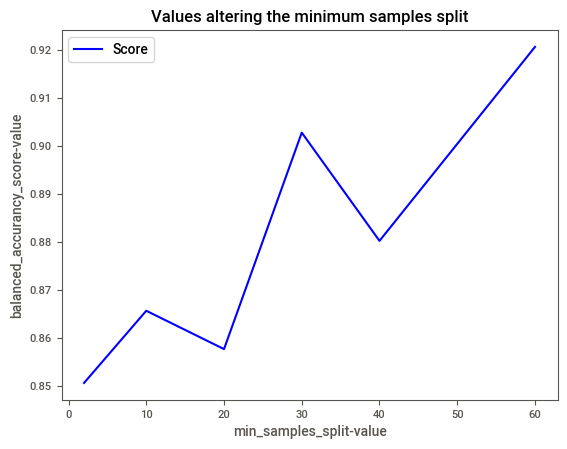

In [31]:
balanced_score = []
min_samp = [2, 10, 20, 30, 40, 60]
for i in min_samp:
  clf = DecisionTreeClassifier(min_samples_split = i, max_depth = None, random_state = 0, criterion = 'gini')
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score = balanced_accuracy_score(y_test, y_pred)
  balanced_score.append(score)
  print(f'Accurancy rate = {round(score*100,2)} %')


plt.plot(min_samp, balanced_score, color='blue', label = 'Score')
plt.xlabel('min_samples_split-value')
plt.ylabel('balanced_accurancy_score-value')
plt.title('Values altering the minimum samples split')
plt.legend()
plt.show()

- Changing the criterion

Acurrancy rate = 85.06 %
Acurrancy rate = 85.06 %


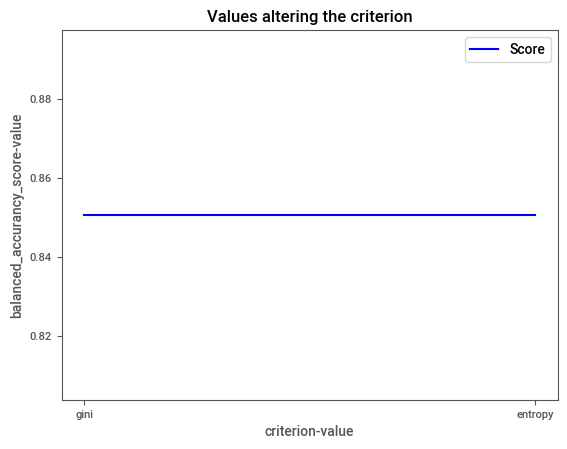

In [26]:
balanced_score = []
min_samp = ['gini','entropy']
for i in min_samp:
  clf = DecisionTreeClassifier(min_samples_split = 2, max_depth = None, random_state = 0, criterion = i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score = balanced_accuracy_score(y_test, y_pred)
  balanced_score.append(score)
  print(f'Acurrancy rate = {round(score*100,2)} %')


plt.plot(min_samp, balanced_score, color='blue', label = 'Score')
plt.xlabel('criterion-value')
plt.ylabel('balanced_accurancy_score-value')
plt.title('Values altering the criterion')
plt.legend()
plt.show()

- Changing the max_depth

Acurrancy rate = 100.0 %
Acurrancy rate = 76.32 %
Acurrancy rate = 98.36 %
Acurrancy rate = 86.84 %
Acurrancy rate = 90.7 %


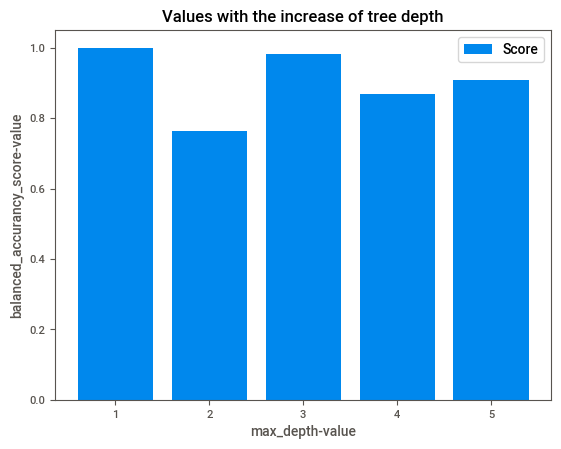

In [27]:
balanced_score = []
min_samp = [ 1, 2, 3, 4, 5]
for i in min_samp:
  clf = DecisionTreeClassifier(min_samples_split = 2, max_depth = i, random_state = 0, criterion = 'gini')
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score = balanced_accuracy_score(y_test, y_pred)
  balanced_score.append(score)
  print(f'Acurrancy rate = {round(score*100,2)} %')


plt.bar(min_samp, balanced_score, label = 'Score')
plt.xlabel('max_depth-value')
plt.ylabel('balanced_accurancy_score-value')
plt.title('Values with the increase of tree depth')
plt.legend()
plt.show()

- Mudando o Splitter

Acurrancy rate = 85.06 %
Acurrancy rate = 83.08 %


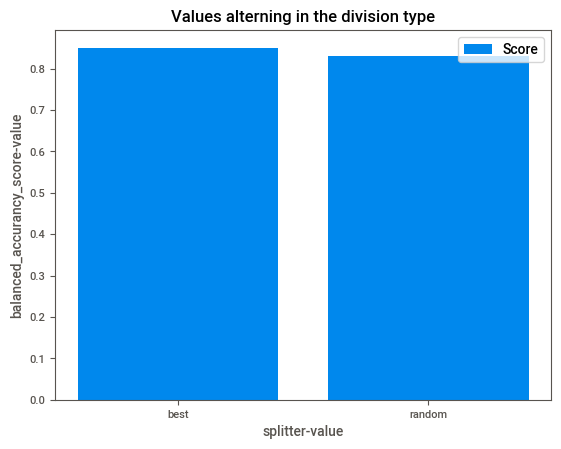

In [28]:
balanced_score = []
min_samp = ['best', 'random']
for i in min_samp:
  clf = DecisionTreeClassifier(min_samples_split = 2, max_depth = None, random_state = 0, criterion = 'gini', splitter = i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score = balanced_accuracy_score(y_test, y_pred)
  balanced_score.append(score)
  print(f'Acurrancy rate = {round(score*100,2)} %')


plt.bar(min_samp, balanced_score, label = 'Score')
plt.xlabel('splitter-value')
plt.ylabel('balanced_accurancy_score-value')
plt.title('Values alterning in the division type')
plt.legend()
plt.show()